# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#finding number of rows and columns
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:
There are 6 numerical columns and 3 object type columns.

Rating column is being read as object type column but it should be an integer type column.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# replacing values with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)

# changing the data type to float
df['rating'] = df['rating'].astype(float)

#checking for missing values
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
We treated the missing values in rating "Not given" with nan and change the data type to float.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#finding statistics about data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The minimum time it takes for food preparation is 20 minutes, the average time is 27.37 minutes and the maximum time it takes is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# finding the number of null entries in the rating column
df['rating'].isnull().sum()

736

#### Observations:
736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Restaurants

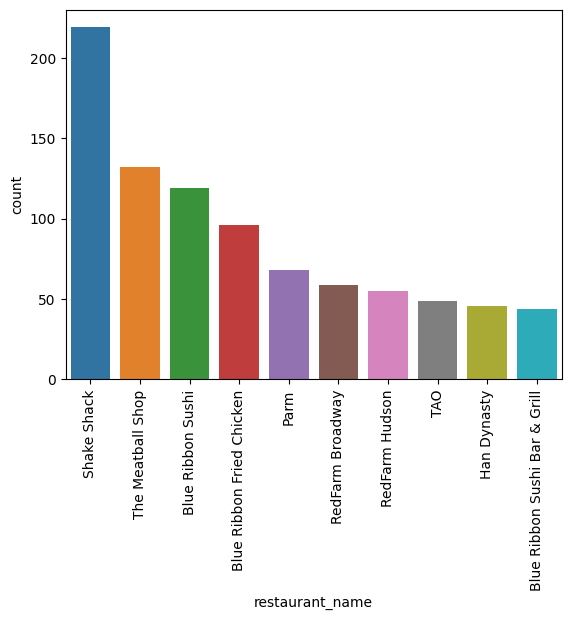

In [ ]:
sns.countplot(data=df,x='restaurant_name',order=pd.value_counts(df['restaurant_name']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

#### Observations:
Shake Shack is the most prefered restaurant with over 200 orders.

Most of the top 10 restaurants are a mix of American, Chinese, and Italian cuisines.

### Cuisines

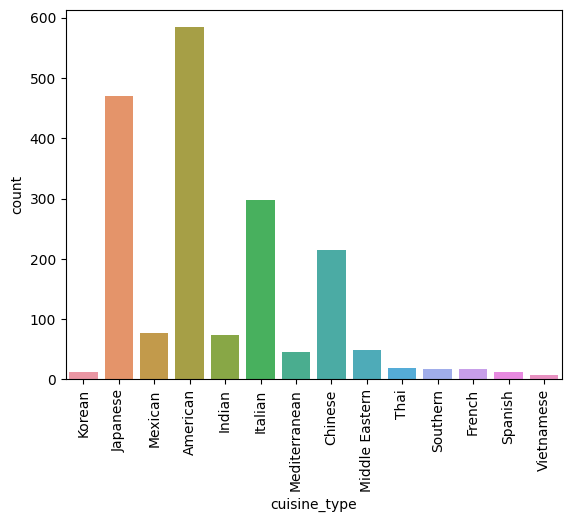

In [ ]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
American, Japanese, Italian cuisines are the top 3 in the order mentioned.

vietnamese is the least favorite cuisine type.

### Day of order

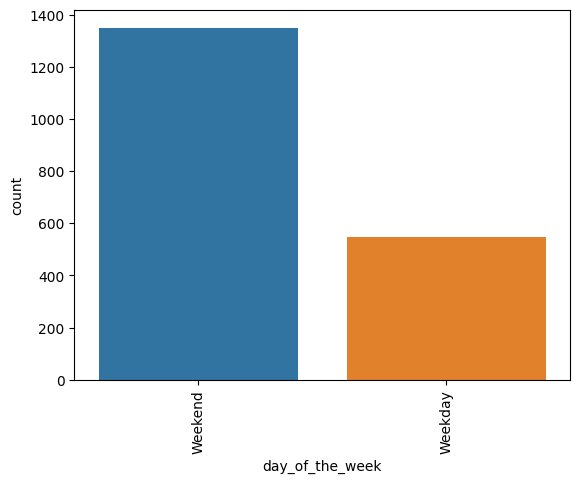

In [ ]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations:
There are close to 1400 oders during the weekend over 600 during the weekday.

Approximately 2.5 times more orders are placed during the weekends compared to weekdays.

### Cost

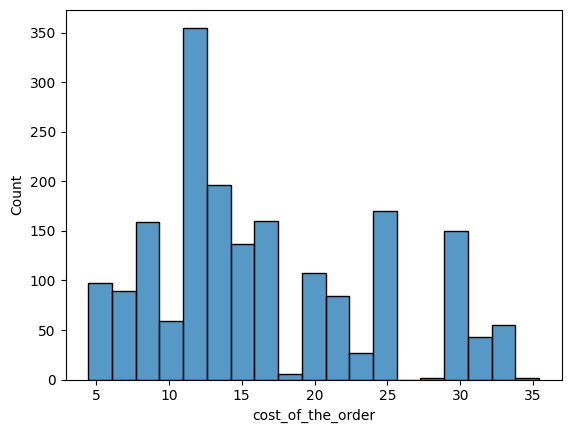

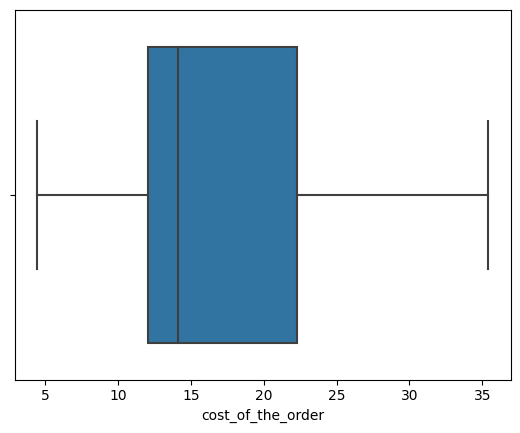

In [ ]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations:
There are no outliers present.

The range is from roughly 4 to 35 dollars.

The mean cost of the order is 14 dollars  with most orders costing from 11 to 22 dollars.




### Ratings

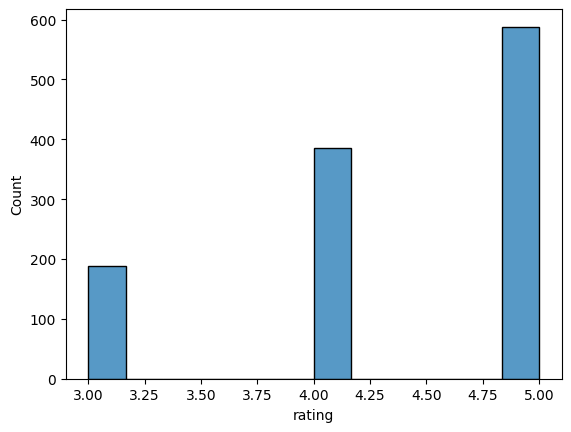

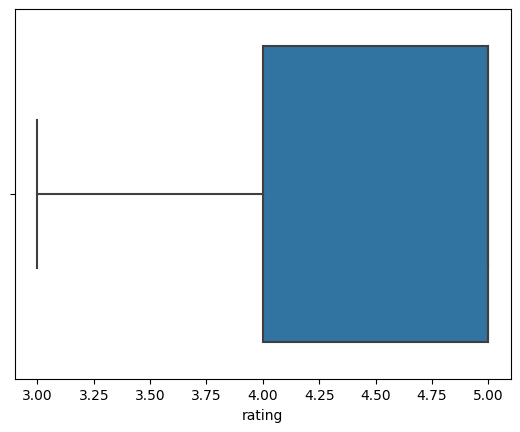

In [ ]:
sns.histplot(data=df,x='rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()

#### Observations:
There are no outliers present.

The graph is slightly skewed to the left with a range of 3.0 to 5.0.

5.0 was the highest count of ratings amongst others.



### Food Preparation Time

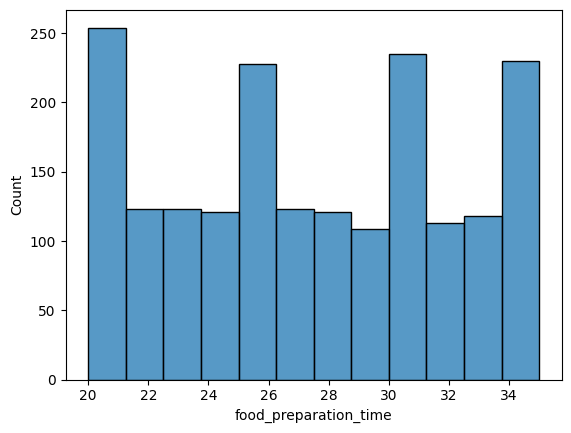

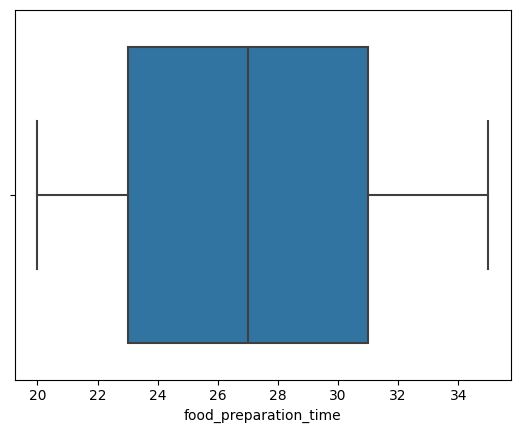

In [ ]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations:
Food preparation time ranged anywhere from 20 to 35 minutes.

Mean food prepartion time was 27 minutes and most orders took 23 to 31 minutes to prepare.

### Delivery Time

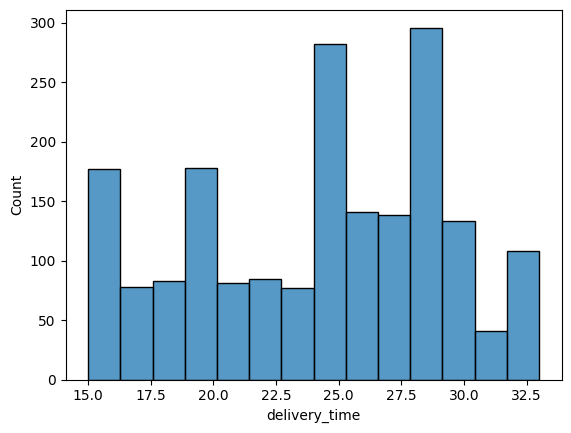

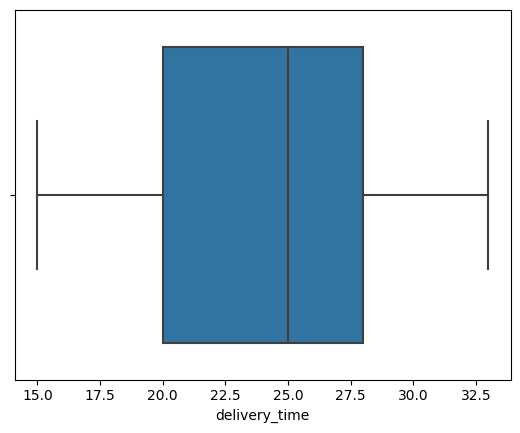

In [ ]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:
Delivery time ranged from 15 to 33 minutes.

Mean delivery time was 25 minutes.

There are no outliers present and most orders took between 20 to 28 minutes to deliver.

### Customers

In [ ]:
#checking for unique values
print(df['customer_id'].nunique)

#checking to see whether all values are unique
print(df['customer_id'].is_unique)

#checking for duplicates
print(df['customer_id'].duplicated().sum())

<bound method IndexOpsMixin.nunique of 0       337525
1       358141
2        66393
3       106968
4        76942
         ...  
1893    292602
1894    397537
1895     35309
1896     64151
1897    120353
Name: customer_id, Length: 1898, dtype: int64>
False
698


#### Observations:
There are 1200 customers total as there are 698 duplicates out of the 1898 total customers.

### Orders

In [ ]:
#checking for unique values
print(df['order_id'].nunique)

#checking to see whether all values are unique
print(df['order_id'].is_unique)

#cheking for duplicates
print(df['order_id'].duplicated().sum())

<bound method IndexOpsMixin.nunique of 0       1477147
1       1477685
2       1477070
3       1477334
4       1478249
         ...   
1893    1476701
1894    1477421
1895    1477819
1896    1477513
1897    1478056
Name: order_id, Length: 1898, dtype: int64>
True
0


#### Observations:
There are 1898 orders and no duplicates.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#finding the top 5 restaurants using value counnts and iloc
pd.value_counts(df['restaurant_name']).iloc[:5].index

Index(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm'],
      dtype='object')

#### Observations:
The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#grouping by cuisine type and counting number of occurences
pc = df.groupby(['cuisine_type','day_of_the_week'])['cuisine_type'].agg(['count'])

#sorting by descending order
pc_sort = pc.sort_values(by='count',ascending=False)

#finding the highest ranking cuisine
print(pc_sort.iloc[:1])

                              count
cuisine_type day_of_the_week       
American     Weekend            415


#### Observations:
The most popular cuisine on the weekends is American with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#extracting just the cost of order column
cost = df['cost_of_the_order']

#exrracting and counting orders which cost more than 20 dollars
oc20 = cost.loc[(df['cost_of_the_order'] > 20)]
oc20_count = oc20.count()

#counting total number of orders
total_count = cost.count()

#finding the percentage
print((oc20_count / total_count) * 100)

29.24130663856691


#### Observations:
29.24% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
#finding the average delivery time
print(df['delivery_time'].mean())

24.161749209694417


#### Observations:
The average order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Group the data by customer_id and count the number of orders
cust_ord = df.groupby('customer_id').count()['order_id']

# Sort the customer_orders in descending order
cust_ord_sort = cust_ord.sort_values(ascending=False)

# Get the top 5 customers
top_5_cust = cust_ord_sort.head(5)
top_5_cust

for customer_id, num_orders in top_5_cust.items():
    print(f'Customer ID: {customer_id}, Number of Orders: {num_orders}')

Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9
Customer ID: 250494, Number of Orders: 8
Customer ID: 65009, Number of Orders: 7


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Heat map

<ipython-input-27-bf1b453efe19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


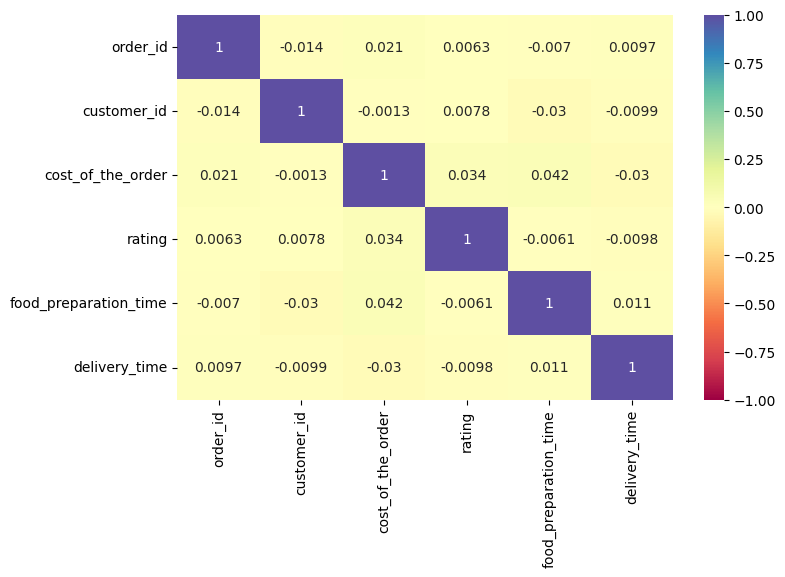

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations:
There are positive and negative correlations, however, they are are not significant.

### Cuisine vs Cost

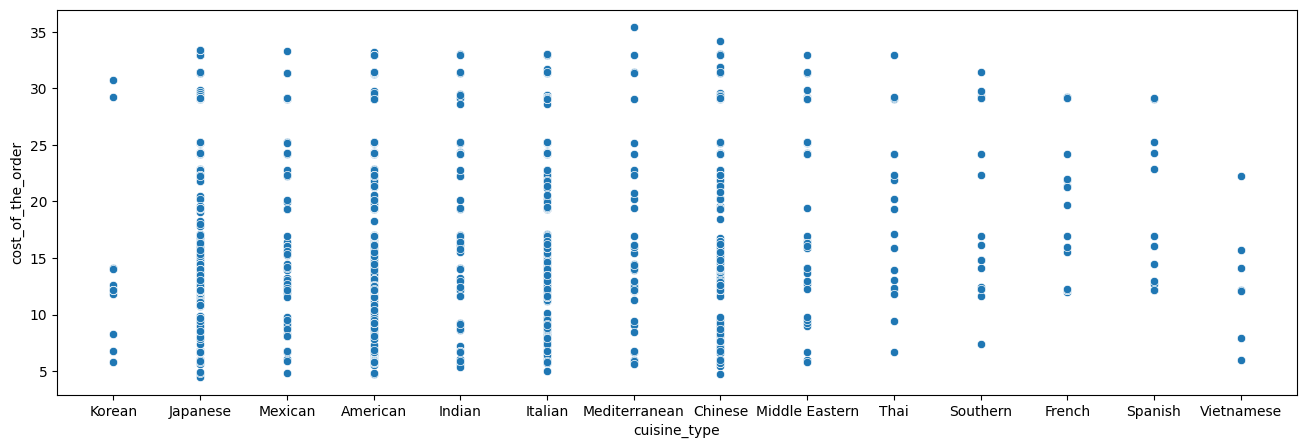

In [ ]:
# Write the code here
plt.figure(figsize=(16,5))
sns.scatterplot(data=df, x='cuisine_type', y ='cost_of_the_order')
plt.show()

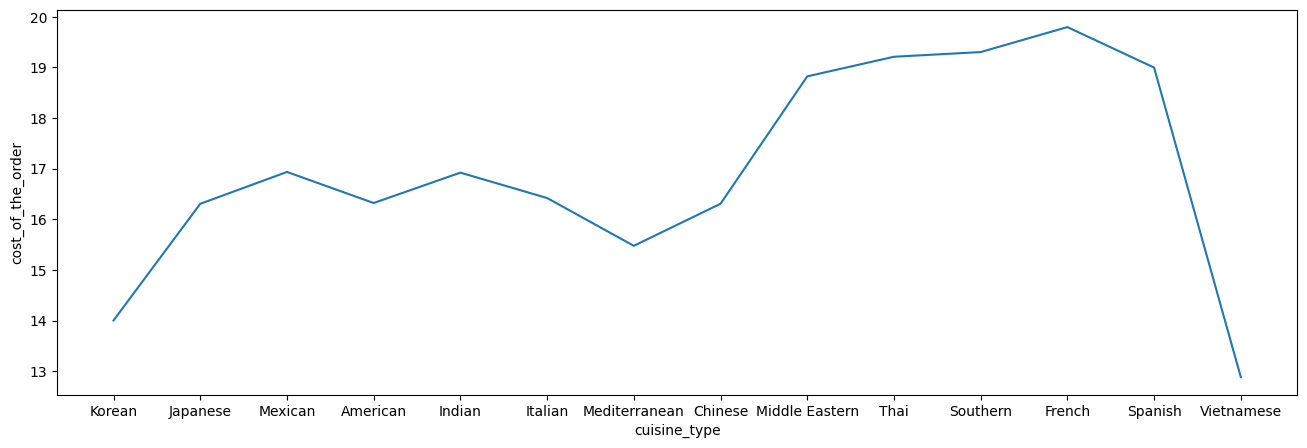

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(data=df, x='cuisine_type', y ='cost_of_the_order',errorbar=None)
plt.show()

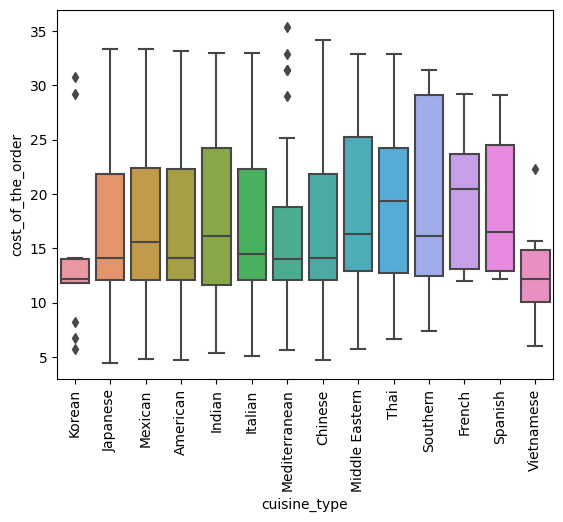

In [ ]:
g = sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
gx = g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show(gx)

#### Observations:
We observe that all cuisines have orders of different prices.

It can be seen that Middle Easterm, Thai, Southern, French and Spanish food tend to cost more compared to other cuisines.

French and Thai cuisines average the highest cost per order.

Korean and vietnamese cuisines seem to cost less compared to other cuisines.

It can be seen that Korean, Mediterranean and vietnamese cuisines have outliers while other cuisines do not.

### Cuisine vs Food Preparation time

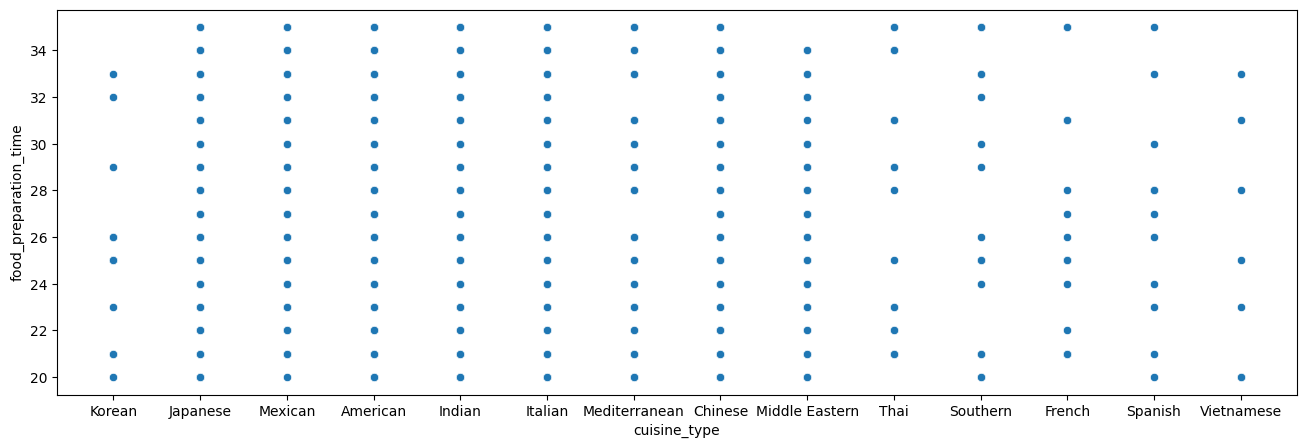

In [ ]:
plt.figure(figsize=(16,5))
sns.scatterplot(data=df, x='cuisine_type', y ='food_preparation_time')
plt.show()

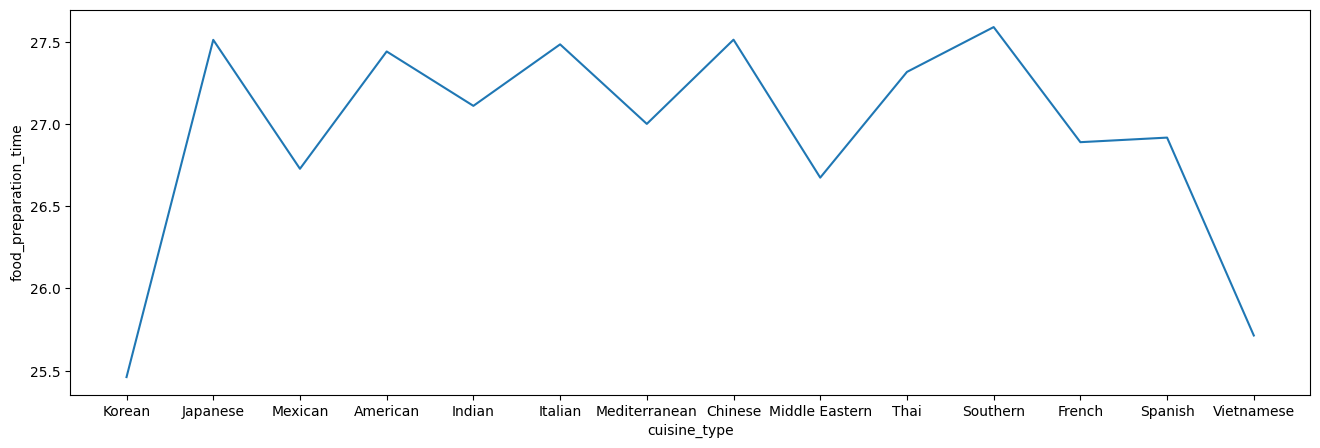

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(data=df, x='cuisine_type', y ='food_preparation_time',errorbar=None)
plt.show()

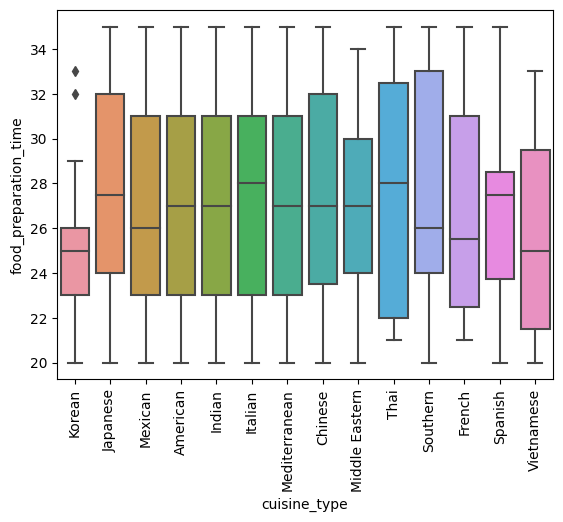

In [ ]:
b = sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
bx = b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show(bx)

#### Observations:
Vietnamese and Korean cuisines seem to take the least amount of time for preparation.

Korean cuisines are the most consistent with their food preparation time.

Thai and Italian cuisines tend to take the longest to prepare.

We can observe that the Korean cuisine has 2 outliers in regards to food preparation time while others have none.

Most of the cuisines prepare witihin 23 to 28 minutes.

### Day of Week vs Delivery time

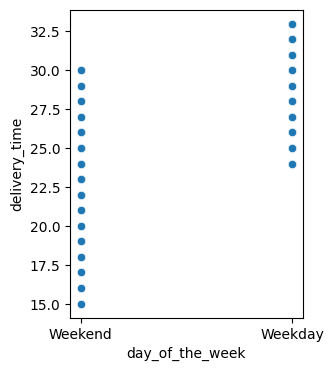

In [ ]:
plt.figure(figsize=(3,4))
sns.scatterplot(data=df, x='day_of_the_week', y ='delivery_time')
plt.show()

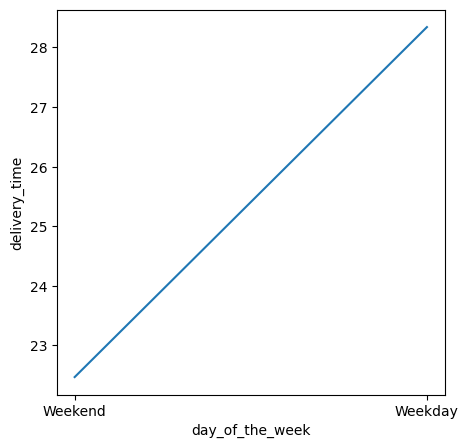

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(data=df, x='day_of_the_week', y ='delivery_time',errorbar=None)
plt.show()

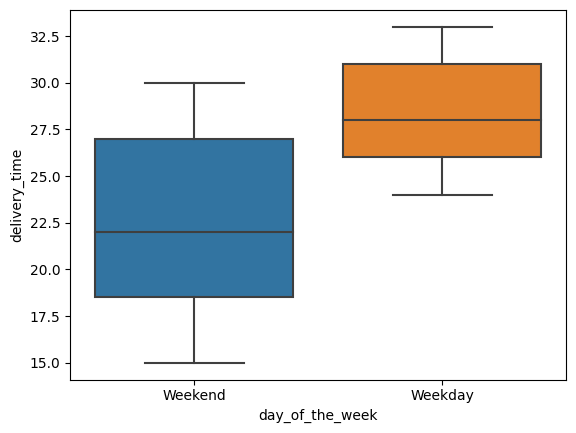

In [ ]:
d = sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

#### Observations:
It can be observed that delivery time is higher for weekdaays compared to the weekends.

Weekend delivery time ranges from 18 to 27 minutes for most orders while weekday delivery time is between 26 to 31 minutes for most orders.

Average weekend delivery time is roughly 22 minutes while weekday delivery time is around 28 minutes.

There are no outliers present.

### Revenue generated by resturants

In [ ]:
#grouping by cuisine type and counting number of occurences
pr = df.groupby(['restaurant_name'])['cost_of_the_order'].sum()

#sorting by descending order
pr_sort = pr.sort_values(ascending=False)

#finding the top 10 highest ranking cuisines
print(pr_sort.iloc[:10])

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64


#### Observations:
Out of the 178 restaurants, the 10 above are the highest in revenue generated.

Shake Shack had the most amount of revenue generated.

Most of the top 10 restaurants are American, Chinese and Itralian restaurants.

### Rating vs Delivery time

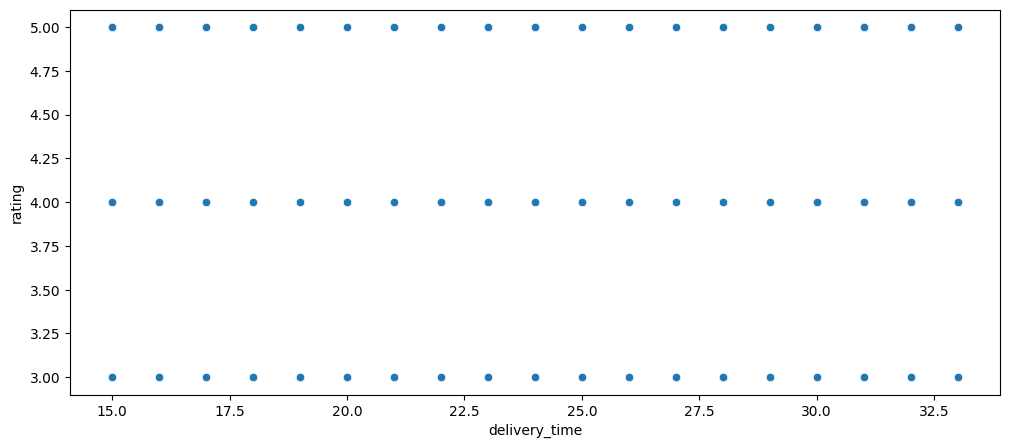

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='delivery_time', y ='rating')
plt.show()

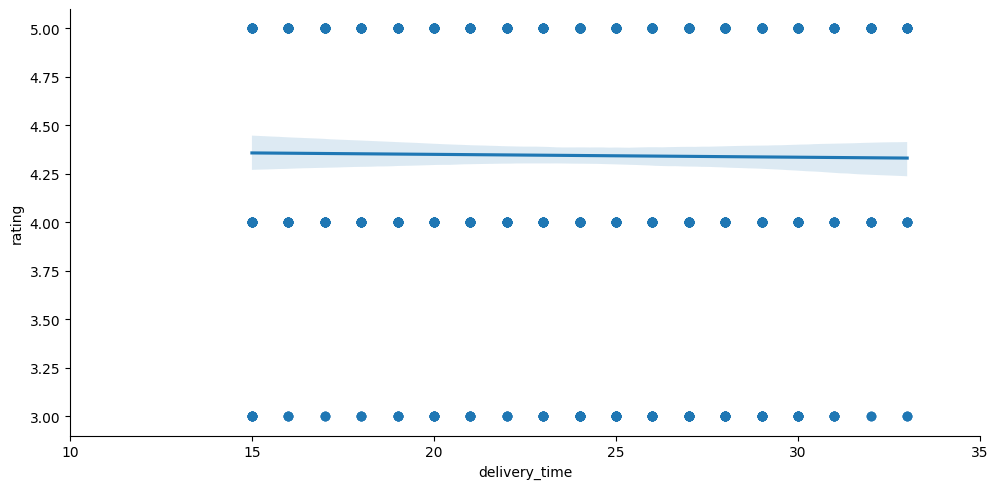

In [ ]:
sns.lmplot(data=df,x='delivery_time',y='rating',height=5,aspect=2)
plt.xlim(10,35)
plt.show()

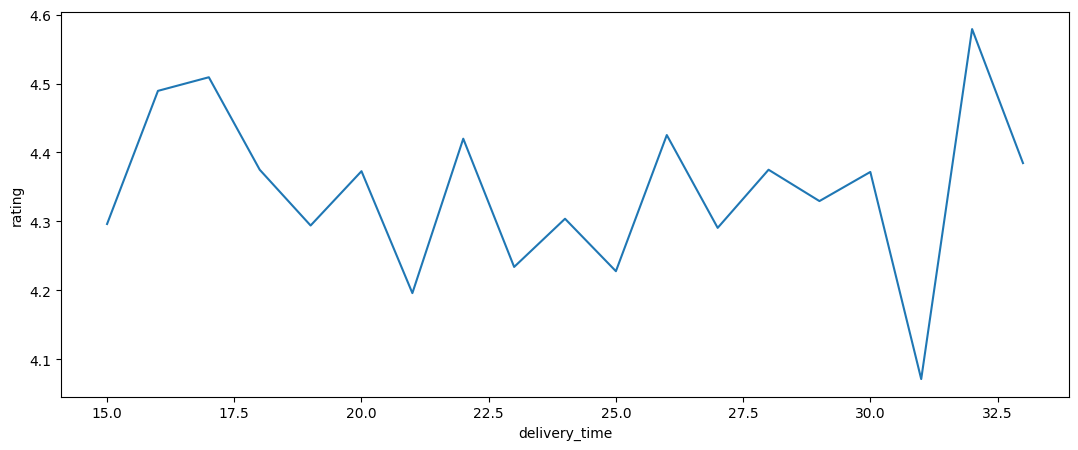

In [ ]:
plt.figure(figsize=(13,5))
sns.lineplot(data=df, x='delivery_time', y ='rating',errorbar=None)
plt.show()

#### Observations:

Rating does not change much with faster and slower delivery times however orders in the middle range of the delivery time tend to have lower ratings.

Orders which took 31 minutes to deliver have the lowest ratings.

### Rating vs Food Preparation time

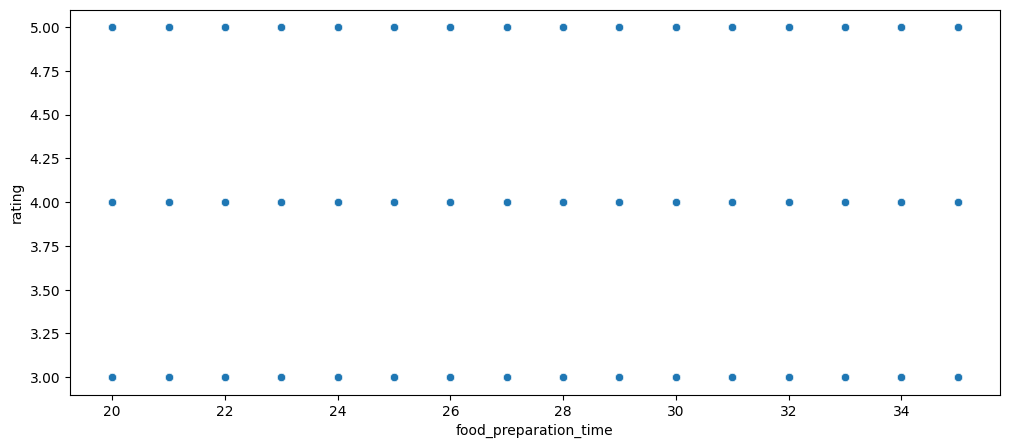

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='food_preparation_time', y ='rating')
plt.show()

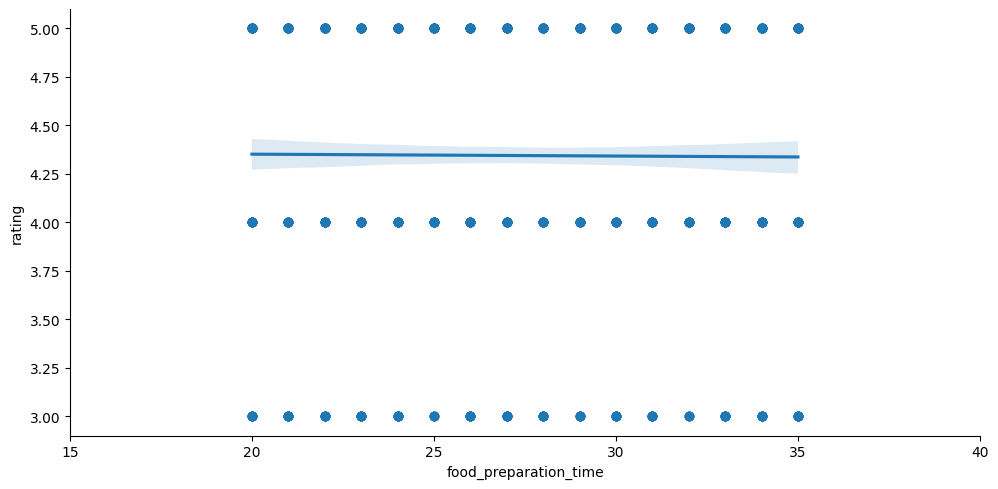

In [ ]:
sns.lmplot(data=df,x='food_preparation_time',y='rating',height=5,aspect=2)
plt.xlim(15,40)
plt.show()

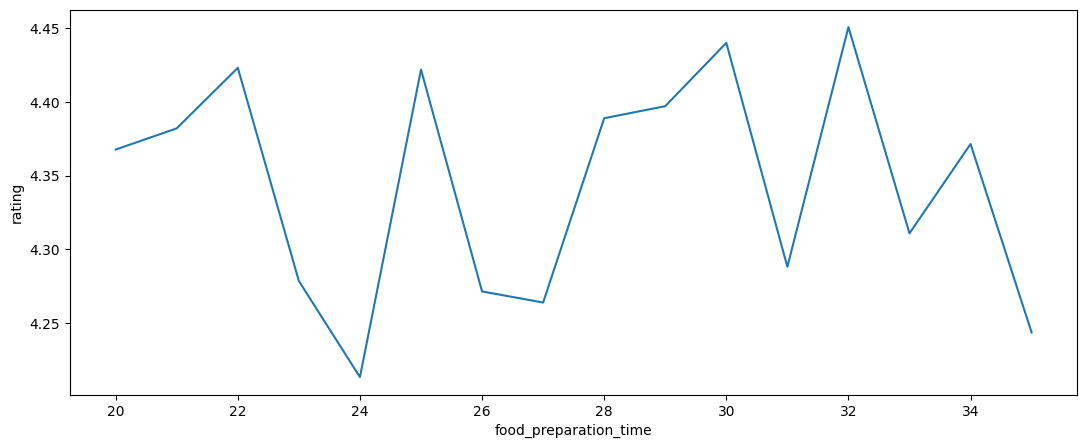

In [ ]:
plt.figure(figsize=(13,5))
sns.lineplot(data=df, x='food_preparation_time', y ='rating',errorbar=None)
plt.show()

#### Observations:
There is noise present.

The lowest ratings were for orders which took 24 minutes to prepare.

### Rating vs Cost

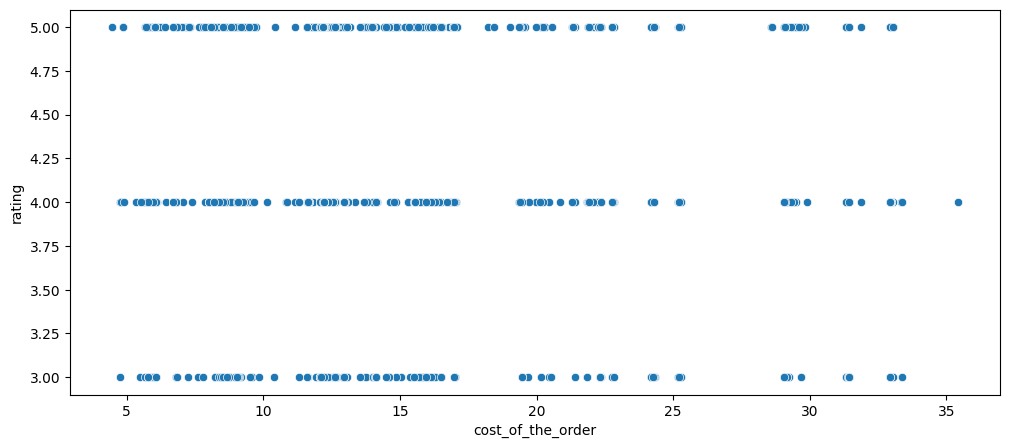

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='cost_of_the_order', y ='rating')
plt.show()

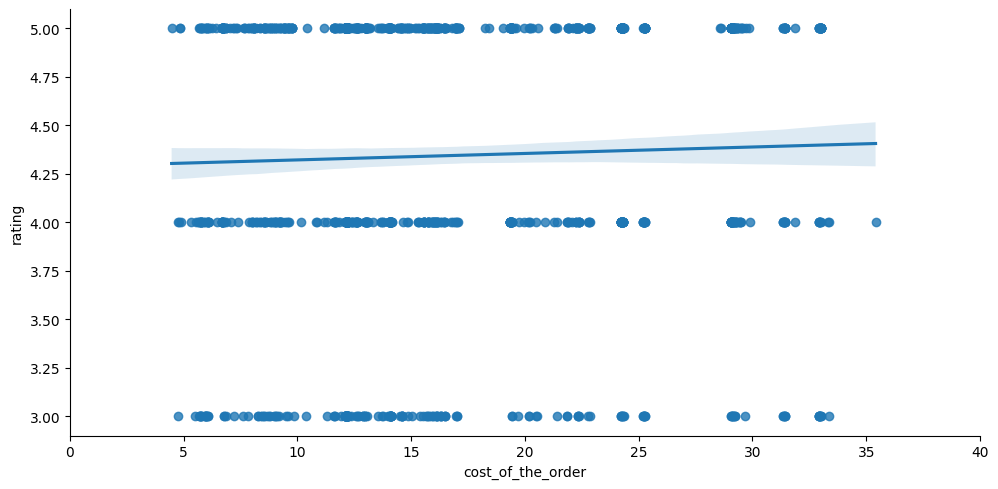

In [ ]:
sns.lmplot(data=df,x='cost_of_the_order',y='rating',height=5,aspect=2)
plt.xlim(0,40)
plt.show()

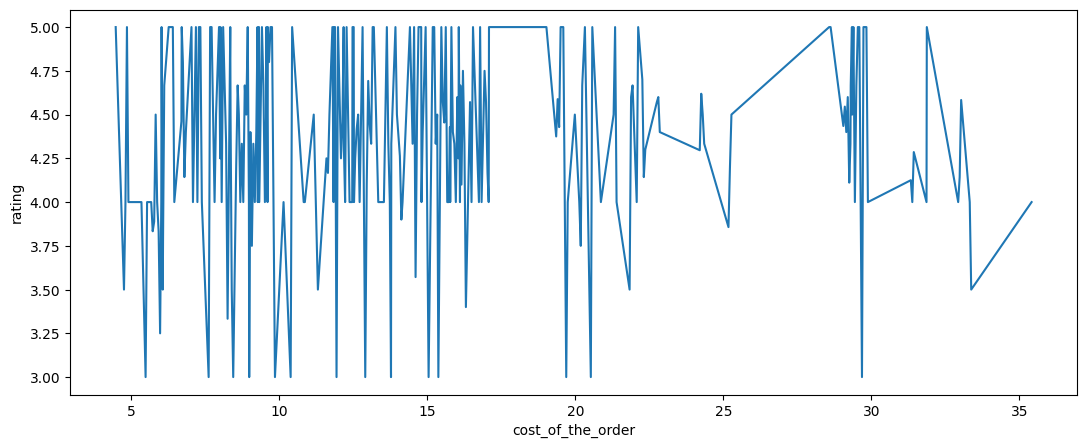

In [ ]:
plt.figure(figsize=(13,5))
sns.lineplot(data=df, x='cost_of_the_order', y ='rating',errorbar=None)
plt.show()

#### Observations:
Extreme noise present.

Cost of the order does not seem to correlate much to ratings received.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# creating a dataframe
data = pd.DataFrame(df, columns=['restaurant_name','rating'])

#finding restaurant with ratings greater than 4
five_star_ratings = data[data['rating']>4].drop_duplicates()['restaurant_name']

#finding and filtering restuarants with more than 50 rating counts
restaurant_ratings_count = data.groupby(['restaurant_name'])['rating'].count()
more_than_50 = restaurant_ratings_count[restaurant_ratings_count>50]

#merging and getting final result
promo = pd.merge(five_star_ratings,more_than_50,left_on='restaurant_name',right_on='restaurant_name')

print(promo)

             restaurant_name  rating
0  Blue Ribbon Fried Chicken      64
1                Shake Shack     133
2          The Meatball Shop      84
3          Blue Ribbon Sushi      73


#### Observations:
The restaurants fulfilling the criteria to get the promotional offer are Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
revenue = 0
income = 0
# Create a series of the cost column
cost = pd.Series(df['cost_of_the_order'])

# go through each variable based on the given conditions
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income
print(revenue)

6166.302999999994


#### Observations:
$6166.30 net revenue generated by the company across all orders given the above conditions.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Create a new column to for total delivery time
df['total_prep_time'] =df['food_preparation_time']+df['delivery_time']

#confirm the new column
df.head()

#percentage of orders taking more than 60 minutes
total_orders = df['total_prep_time'].count()
ord60 = df['total_prep_time'][df['total_prep_time']> 60].count()

perc_above60 = round((ord60/total_orders)*100,2)
print(perc_above60)

10.54


#### Observations:
10.54% of the orders take more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# seprate weekday and weekend data
weekday_data = df[df['day_of_the_week'].isin(['Weekday'])]
weekend_data = df[df['day_of_the_week'].isin(['Weekend'])]

# Calculate weekdays and weekends mean delivery time
mean_del_time_weekday = weekday_data['delivery_time'].mean()
mean_del_time_weekend = weekend_data['delivery_time'].mean()
print(mean_del_time_weekday)
print(mean_del_time_weekend)

28.340036563071298
22.4700222057735


#### Observations:
The mean delivery time for weekdays are 28.34 minutes while the mean delivery time for weekends are 22.47 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Most Popular Restaurant is Shake Shack.
* Most Popular Cuisine is American.
* Most orders were placed during the weekend.
* Around 2/3 of customers only used the app once to purchase food, the remaining percentage were mainly customers who used the app twice to purchase food.
* The mean cost of the orders is 14 dollars with most orders costing from 11 to 22 dollars.
* 736 orders out of 1898 were not rated, those which rated had ratings of 3, 4 or 5.


### Recommendations:

*  Try to engage customers which did not order more than twice from the app and find out the reason why they did not return for more services.
* Focus on increasing revenue by selling extra items when checking out customers which have used the app more than 2 times to purchase food.
* Offer savings and bonuses for completing feedbacks within an hour of delivery.
* Include a comment section within the feedback ratings given to customers in order for customers to voice their own complaints or feedbacks. This will help find out different causes of distress and satisfaction from customers.

---